In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from keras.applications.xception import decode_predictions

!pip install tf_keras_vis
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.gradcam import Gradcam

# When the softmax activation function is applied to the last layer of model, it may obstruct generating the attention images, so you should replace the function to a linear activation function.
replace2linear = ReplaceToLinear()


# 1 is the imagenet index corresponding to brain coral, 107 to jellyfish, 148 to killer whale, 291 to lion, and 108 to sea anemone
score = CategoricalScore([109, 107, 148, 291, 108])

     |████████████████████████████████| 53 kB 817 kB/s 


In [ ]:
# Create the model
model = VGG16(weights='imagenet', include_top=True)

553476096/553467096 [==============================] - 4s 0us/step


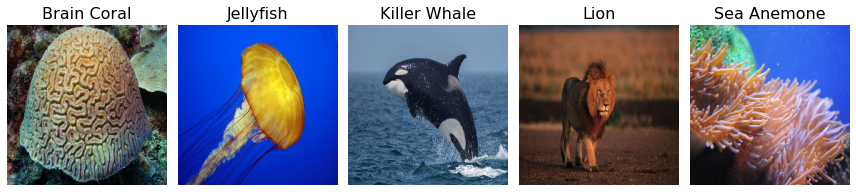

In [ ]:
# Image titles
image_titles = ['Brain Coral', 'Jellyfish', 'Killer Whale', 'Lion', 'Sea Anemone']

# Load images and Convert them to a Numpy array
img1 = image.load_img('/content/drive/MyDrive/brain coral.jpg', target_size=(224, 224))
img2 = image.load_img('/content/drive/MyDrive/jellyfish.jpg', target_size=(224, 224))
img3 = image.load_img('/content/drive/MyDrive/killer whale.jpg', target_size=(224, 224))
img4 = image.load_img('/content/drive/MyDrive/lion.jpg', target_size=(224, 224))
img5 = image.load_img('/content/drive/MyDrive/sea anemone.jpg', target_size=(224, 224))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3), np.array(img4), np.array(img5)])

# Preparing input data for VGG16
x = preprocess_input(images)

# Rendering
f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Perform predictions
features = model.predict(x)

# Print what the top predicted class is
print("Predicted:", decode_predictions(features, top=1)[0])
print("Predicted:", decode_predictions(features, top=1)[1])
print("Predicted:", decode_predictions(features, top=1)[2])
print("Predicted:", decode_predictions(features, top=1)[3])
print("Predicted:", decode_predictions(features, top=1)[4])

Predicted: [('n01917289', 'brain_coral', 0.9990822)]
Predicted: [('n01910747', 'jellyfish', 0.99999)]
Predicted: [('n02071294', 'killer_whale', 0.9980908)]
Predicted: [('n02129165', 'lion', 0.9796825)]
Predicted: [('n01914609', 'sea_anemone', 0.4919445)]


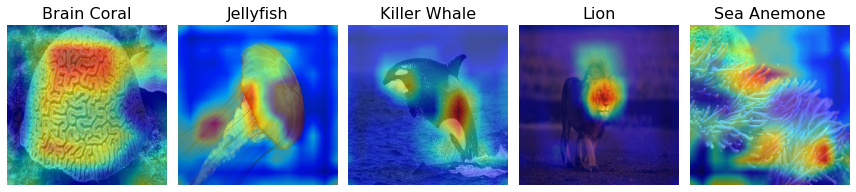

In [ ]:


# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)

# Generate heatmap with GradCAM
cam = gradcam(score,
              x,
              penultimate_layer=-1)

# Render
f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12, 4))
for i, title in enumerate(image_titles):
    heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
    ax[i].axis('off')
plt.tight_layout()
plt.show()